### Importing the necessary libraries for the assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Question 1: The following data shows the sales of company X in successive 4-week periods over 1967-1970. 
| Year| 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   | 9   | 10 | 11 | 12 | 13  |
| --- |-----|-----|-----|-----|-----|-----|-----|-----|-----|----|----|----|-----|
|1967| 153 | 189 | 221 | 215 | 302 | 223 | 201 | 173 | 121 | 106 | 86 | 87 | 108 |
|1968| 133 | 177 | 241 | 228 | 283 | 255 | 238 | 164 | 128 | 108 | 87 | 95 | 95  |
|1969| 145 | 200 | 187 | 201 | 292 | 220 | 233 | 172 | 119 | 81 | 65 | 76 | 74  |
|1970| 111 | 170 | 243 | 178 | 248 | 202 | 163 | 139 | 120 | 96 | 95 | 53 | 94  |

### 1.a) Plot the data

In [2]:
data = [153, 189, 221, 215, 302, 223, 201, 173, 121, 106, 86, 87, 108,
        133, 177, 241, 228, 283, 255, 238, 164, 128, 108, 87, 95, 95,
        145, 200, 187, 201, 292, 220, 233, 172, 119, 81, 65, 76, 74,
        111, 170, 243, 178, 248, 202, 163, 139, 120, 96, 95, 53, 94]
date_range = pd.date_range(start='1967-01-01', periods=52, freq='4W')
df = pd.DataFrame({'date': date_range, 'sales': data})

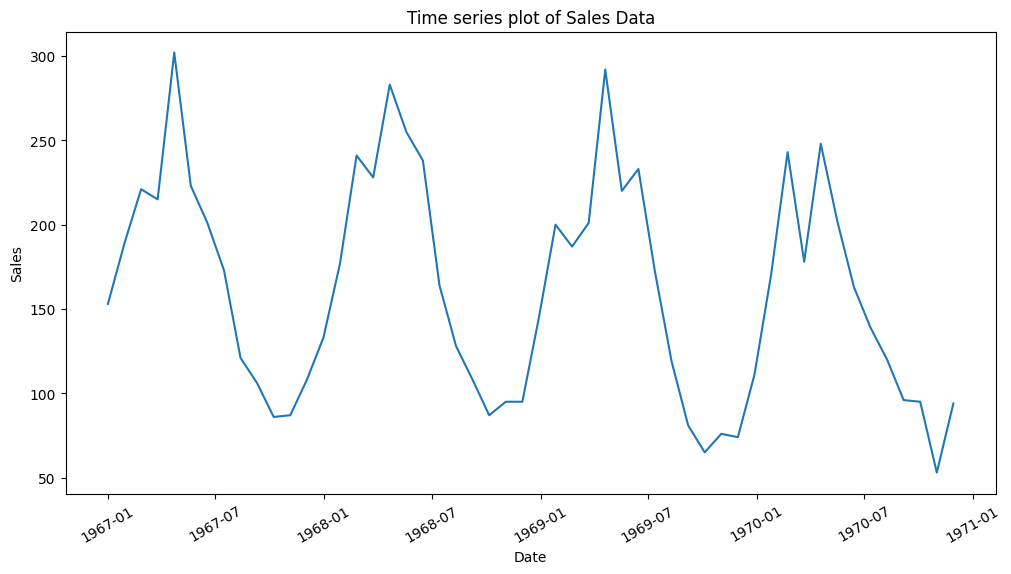

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['sales'])
plt.xticks(rotation=30)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Time series plot of Sales Data')
plt.show()

### 1.b) Assess the trend and seasonality in the data

Seasonality: The data is seasonal as we can see that the sales are increasing and decreasing in a cyclic manner. The sales are high around in the middle of the year and low at the end of the year.

Trend: There is a decrease in trend

## Question 2: Sixteen successive observations on a stationary time series are as follows:
1.6, 0.8, 1.2, 0.5, 0.9, 1.1, 1.1, 0.6, 1.5, 0.8, 0.9, 1.2, 0.5, 1.3, 0.8, 1.2

In [4]:
data = [1.6, 0.8, 1.2, 0.5, 0.9, 1.1, 1.1, 0.6, 1.5, 0.8, 0.9, 1.2, 0.5, 1.3, 0.8, 1.2]
df = pd.DataFrame({'data': data})

### 2.a) Plot the Observations

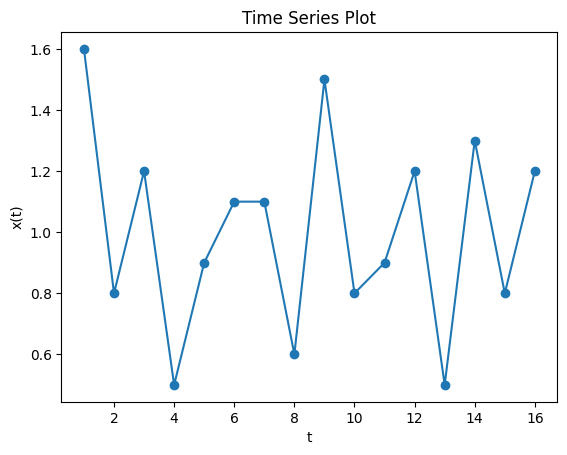

In [5]:
fig1 = plt.figure()
plt.plot(range(1, len(data) + 1), df['data'], marker='o')
plt.title('Time Series Plot')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

### 2.b) Looking at the graph, guess an approximate value for the autocorrelation coefficient at lag 1.

Yet to write

### 2.c) Plot $x_t$ vs $x_{t+1}$ and try to guess the value of $r_1$.

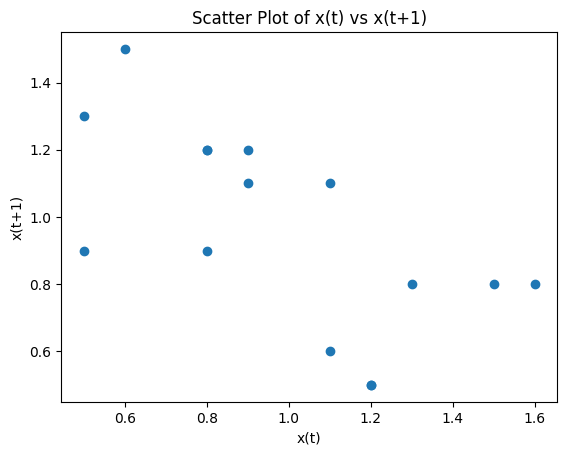

In [6]:
fig2 = plt.figure()
plt.scatter(df['data'][:15], df['data'][1:16], marker='o')
plt.xlabel('x(t)')
plt.ylabel('x(t+1)')
plt.title('Scatter Plot of x(t) vs x(t+1)')
plt.show()

 yet to write

### 2.d) Calculate $r_1$.

##### Formula of ACF: $r_h = \frac{Cov(X_t,X_{t+h})}{Var(X_t)} = \frac{\sum_{t=1}^{n-h}(x_t - \bar{x})(x_{t+h} - \bar{x})}{\sum_{t=1}^{n}(x_t - \bar{x})^2}$

In [7]:
def acf(dt, tc, lag):
    """
    Function to calculate auto-correlation coefficient of given lag
    :param dt: pd.DataFrame - dataset
    :param tc: string - target column
    :param lag: int - lag
    :return: int - auto-correlation coefficient
    """
    n = len(dt)
    d1 = dt[tc]
    mean_data = np.mean(dt[tc])
    acf_value = sum(
        (d1[:n - lag] - mean_data).reset_index(drop=True) * (d1[lag:] - mean_data).reset_index(drop=True)) / sum(
        (d1 - mean_data).reset_index(drop=True) ** 2)
    return acf_value

lag = 1
r1 = acf(df, 'data', lag)
print("Auto-correlation coefficient r1:", r1)

Auto-correlation coefficient r1: -0.548780487804878


##### $ \therefore r_1 = -0.54878$

## 3. For the airline passengers data already available in R, plot the autocorrelation function (ACF) for a range of lag values. Interpret the results.

#### Load data
data("AirPassengers")
data <- AirPassengers

#### acf_value function for lag `lag`
acf_value <- function(data, lag){
    data_size <- length(data)
    mean_data <- mean(data)
    acf_v <- sum((data[1:(data_size - lag)] - mean_data) * (data[(lag + 1):data_size] - mean_data)) / sum((data - mean_data)^2)
    return (acf_v)
    }

#### acf_value_t function from lag 0 to `total_lags-1`
acf_value_t <- function(data, total_lags){
     acf_values <- numeric(total_lags-1)
     for (lag in 0:total_lags-1){
         acf_values[lag+1] <- acf_value(data,lag)
         }
     return (acf_values)
     }
 
total_lags<-50
acf_values<-acf_value_t(data, total_lags)
plot((1:total_lags)-1,acf_values, type = "h", xlab = "Lag", ylab = "ACF",
   main = "Autocorrelation Function")

![img.png](img.png)

## 4. Consider a time series with both trend and seasonal effects present. Model the time series as $X_{t} = a_0 + a_{1}t + b_{1}cos(\lambda t) + c_{1}sin(\lambda t) + \epsilon_{t}, t=1,...,25$.Assume that $\lambda = \pi$. Estimate the above coefficients for the following time series data:
(2.7, 7.8, 6.2, 10.7, 9.6, 14.0, 13.2, 16.1, 17.9, 22.2, 23.7, 24.6, 24.6, 28.7, 28.6, 34.5, 34.1, 39.0,
38.7, 43.2, 42.3, 46.2, 46.3, 48.5, 49.8)

In [8]:
data = [2.7, 7.8, 6.2, 10.7, 9.6, 14.0, 13.2, 16.1, 17.9, 22.2, 23.7, 24.6, 24.6, 28.7, 28.6, 34.5, 34.1, 39.0,
        38.7, 43.2, 42.3, 46.2, 46.3, 48.5, 49.8]

$Y$ is the target vector & $\mathbf{X}$ is the design matrix 

In [9]:
Y = np.matrix(data).reshape(len(data), 1)
a_0 = np.matrix(np.ones((len(data), 1)))
a_1 = np.matrix(range(1, len(data) + 1)).reshape(len(data), 1)
b_1 = np.matrix([np.cos(np.pi * t) for t in range(1, len(data) + 1)]).reshape(len(data), 1)
c_1 = np.matrix([np.sin(np.pi * t) for t in range(1, len(data) + 1)]).reshape(len(data), 1)
X = np.hstack([a_0, a_1, b_1, c_1])

##### For time series model $X_{t} = a_0 + a_{1}t + b_{1}cos(\lambda t) + c_{1}sin(\lambda t) + \epsilon_{t}, t=1,...,25$
The coefficient vector $\beta = (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T Y $

In [10]:
beta = (X.T * X).I * X.T * Y

In [11]:
print("The estimated coefficients are:")
print(f"a_0: {beta[0, 0]}")
print(f"a_1: {beta[1, 0]}")
print(f"b_1: {beta[2, 0]}")
print(f"c_1: {beta[3, 0]}")

The estimated coefficients are:
a_0: 1.121796176620368
a_1: 1.989227556701689
b_1: 1.0807941181036353
c_1: 47714090888061.12


### $\beta = \begin{bmatrix} a_0 \\ a_1 \\ b_1 \\ c_1 \end{bmatrix} = \begin{bmatrix} 1.121796176620368 \\ 1.989227556701689 \\ 1.0807941181036353 \\ 47714090888061.12 \end{bmatrix} $